# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Loading dataset

In [2]:
df = pd.read_csv('Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Data Insights

In [3]:
df.shape

(6435, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Check for missing values

<AxesSubplot:>

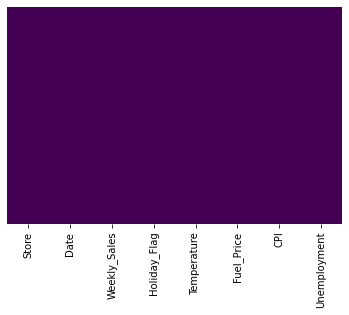

In [7]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')

The data set has no missing values.

# Check for duplicates

In [11]:
df.duplicated().sum()

0

# Summary Statistics

In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


- Mean value is much greater than median value of the weekly sales column which is represented by 50% (50th percentile). 

- There is notably a large difference between 75th %tile and max values of the 'Weekly_Sales' column.

- Observations 1 and 2 suggests that there are extreme outliers in our data set.

# The possible effect of temperature, fuel price, CPI and unemployment on sales

<AxesSubplot:>

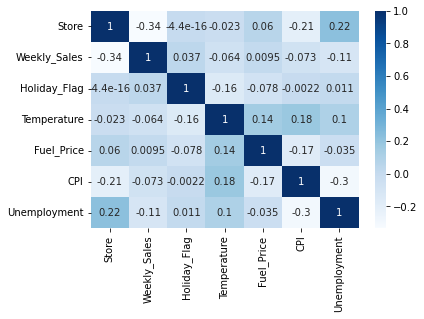

In [9]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

- There doesn't seem to be any significantly meaningful relationships between weekly sales and other variables like temparature, fuel price, CPI and unemployment. 
- The most significant relationship seem to be between weekly sales and unemployment. 
- However, it doesn't seem like any of these variables have a big enough impact on sales for Walmart to care about. 

# Top 5 stores with the highest sales?

In [87]:
df2 = pd.DataFrame(df.groupby(['Store'])['Weekly_Sales'].sum())
df2 = pd.DataFrame(df2.sort_values('Weekly_Sales', ascending = False).head())
df2

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08


Store number 20 had the highest sales, followed by store number 4, 14, 13 and 2. 

# Which is the store that achieved the highest sales in a single week between 2010-02-05 and 2012-11-01?

In [58]:
store_sales_index = df['Weekly_Sales'].idxmax()
store_sales = df.iloc[store_sales_index]
store = store_sales['Store']
date = store_sales['Date']
sales = store_sales['Weekly_Sales']
holiday_or_not = store_sales['Holiday_Flag']
print(f'Store number:{store}, Date:{date}, Sales:{sales}, Holiday:{holiday_or_not}')

Store number:14, Date:24-12-2010, Sales:3818686.45, Holiday:0


In the week of 24-12-2010, store number 14 hit record sales of $3,818,686. And it wasn't a holiday week. It would be interesting to find out what happened during that week that made sales at store number 14 peak. 

# Yearly sales performance during the documented period

In [117]:
#Add date columns
df['dates'] = pd.to_datetime(df['Date'], dayfirst=True)
df['year'] = df['dates'].dt.year
df['month'] = df['dates'].dt.month
df['day'] = df['dates'].dt.day
df.set_index('dates')


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
dates,,,,,,,,,,,
2010-02-05,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
2010-02-12,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2010-02-19,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
2010-02-26,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
2010-03-05,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
2012-10-05,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,5
2012-10-12,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,12


Text(0.5, 1.0, 'Yearly Sales')

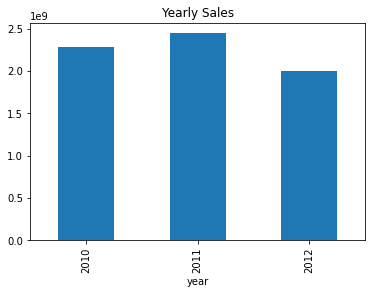

In [129]:
#Yearly Sales
df.groupby('year')['Weekly_Sales'].sum().plot(kind='bar', legend=False)
plt.title('Yearly Sales')

As shown in the graph, sales increased slightly between 2010 and 2011, followed by a reasonably large plunge in 2012. It's important to look into the reason why sales fell (Was there any event that might have caused the decrease in sales? Was it a macro event that affected all other retailers or an internal event?).

# Monthly Sales Performance in 2010, 2011 and 2012

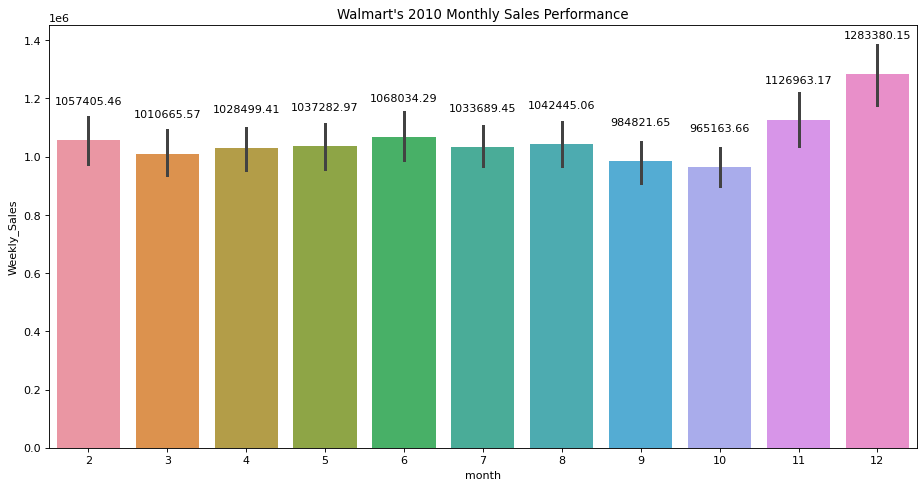

In [121]:
#Monthly Sales Performance in 2010
plt.figure(figsize=(14,7), dpi=80)
graph1 = sns.barplot(data=df, x=df[df.year==2010]['month'], y=df[df.year==2010]['Weekly_Sales'])
graph1.set(title="Walmart's 2010 Monthly Sales Performance")

for p in graph1.patches:
    graph1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 35), textcoords = 'offset points')


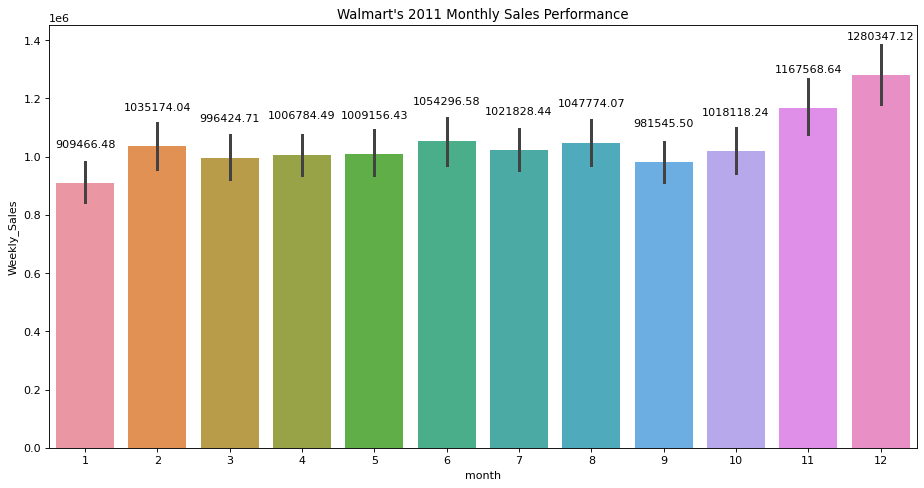

In [123]:
#Monthly Sales Performance in 2011
plt.figure(figsize=(14,7), dpi=80)
graph2 = sns.barplot(data=df, x=df[df.year==2011]['month'], y=df[df.year==2011]['Weekly_Sales'])
graph2.set(title="Walmart's 2011 Monthly Sales Performance")

for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 35), textcoords = 'offset points')

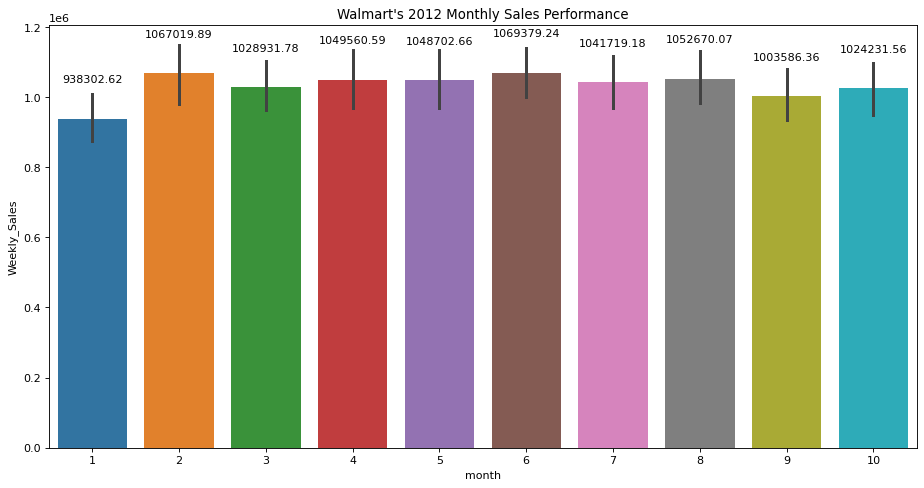

In [127]:
#Monthly Sales Performance in 2012
plt.figure(figsize=(14,7), dpi=80)
graph3 = sns.barplot(data=df, x=df[df.year==2012]['month'], y=df[df.year==2012]['Weekly_Sales'])
graph3.set(title="Walmart's 2012 Monthly Sales Performance")

for p in graph3.patches:
    graph3.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 35), textcoords = 'offset points')

The monthly sales patterns of 2010 and 2011 are pretty similar. Notably, they both had a significant jump at the end of the year from October to December. This might indicate a pattern in people's shopping behaviour (i.e., spending more at the end of the year, which is reasonable because 2 of the biggest holidays in Western countries - Thanksgiving and Christmas - happen in November and December). However, a 2-year pattern is generally not enough to make a conclusion. 

Sales from Q1 to Q3 for all 3 years are considerably stable, which is a good sign. 

#  Which store has maximum standard deviation i.e., the sales vary a lot?

Text(0, 0.5, 'Weekly Sales Variation')

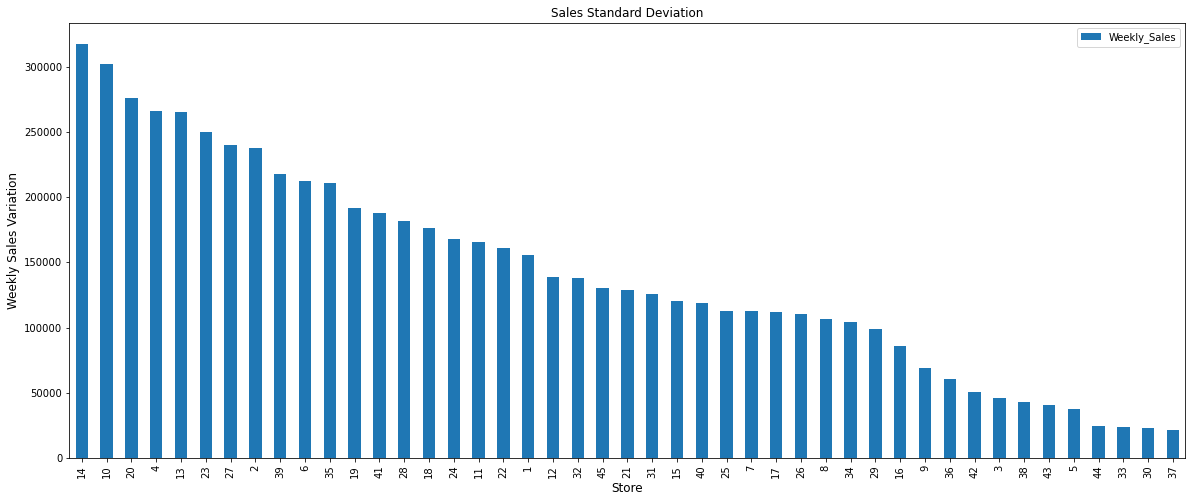

In [88]:
df3 = pd.DataFrame(df.groupby(['Store'])['Weekly_Sales'].std())
df3 = df3.sort_values('Weekly_Sales', ascending = False)

df3.plot(kind='bar', title='Sales Standard Deviation', figsize=(20,8))
plt.xlabel('Store', fontsize=12)
plt.ylabel('Weekly Sales Variation', fontsize=12)

Store number 14 has the greatest variation in sales. It would be interesting to understand why. For example, is it because consumers in the area of Store number 14 are very sensitive to price increases and decreases?

# Do holidays have an impact on shopping behaviour?

In [51]:
#Calculate mean sales of holiday and non-holiday weeks
df4 = pd.DataFrame(df.groupby(['Holiday_Flag'])['Weekly_Sales'].mean())
df4 = df4.sort_values('Weekly_Sales', ascending = False)
df4

,Weekly_Sales
Holiday_Flag,
1,1.122888e+06
0,1.041256e+06


Holiday weeks have higher average sales than non-holiday weeks, which indicates that holiday likely had an impact on shopping behaviour (i.e. people tended to buy more in holiday season). 

# Is there any holiday that has lower sales than the average non-holiday sales?

Super Bowl Average Sales: 1079128.0
Labour Day Average Sales: 1042427.3
Thanksgiving Average Sales: 1471273.4
Christmas Average Sales: 960833.1
Non-holiday sales: 1041256.4


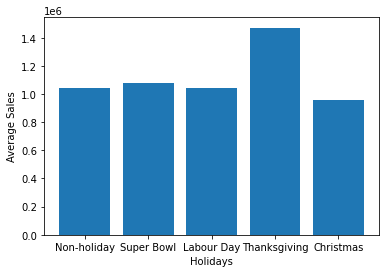

In [86]:
Super_Bowl_days = ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']
Super_Bowl = df[df['Date'].isin(Super_Bowl_days)]

Labour_Day_days = ['10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013']
Labour_Day = df[df['Date'].isin(Labour_Day_days)]

Thanksgiving_days = ['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']
Thanksgiving = df[df['Date'].isin(Thanksgiving_days)]

Christmas_days = ['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']
Christmas = df[df['Date'].isin(Christmas_days)]

holidays = ['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013', '10-09-2010', '09-09-2011', '07-09-2012', '06-09-2013', '26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013', '31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']

Non_holiday = df[~df['Date'].isin(holidays)]

#Calculate the average sales for each holiday

Super_Bowl_sales = Super_Bowl['Weekly_Sales'].mean()
print(f'Super Bowl Average Sales: {Super_Bowl_sales:.1f}')

Labour_Day_sales = Labour_Day['Weekly_Sales'].mean()
print(f'Labour Day Average Sales: {Labour_Day_sales:.1f}')

Thanksgiving_sales = Thanksgiving['Weekly_Sales'].mean()
print(f'Thanksgiving Average Sales: {Thanksgiving_sales:.1f}')

Christmas_sales = Christmas['Weekly_Sales'].mean()
print(f'Christmas Average Sales: {Christmas_sales:.1f}')

#Calculate the average sales on non-holiday weeks

Non_holiday_sales = Non_holiday['Weekly_Sales'].mean()
print(f'Non-holiday sales: {Non_holiday_sales:.1f}')

#Create a bar graph to demonstrate
fig, ax = plt.subplots()
ax.bar(['Non-holiday','Super Bowl', 'Labour Day', 'Thanksgiving', 'Christmas'], [Non_holiday_sales, Super_Bowl_sales, Labour_Day_sales, Thanksgiving_sales, Christmas_sales])
ax.set_title = ('Average holiday and non-holiday sales')
ax.set_xlabel('Holidays')
ax.set_ylabel('Average Sales')
plt.show()

We can see that Christmas is the only holiday where sales are lower than non-holiday season. It would be useful to understand why (e.g., How long had this trend been happening? If it had been happening for 3 or more years, we might conclude that people's shopping behaviour had changed and they were not buying much on Christmas anymore. If so, is there anything we can do to reverse this trend?)

It is also noticeable that sales were considerably higher on Thanksgiving weeks than other holidays and non-holiday weeks. Again, it would be interesting to understand why people were buying more on Thanksgiving and whether it signified any change in consumer behaviour (e.g., Was Thanksgiving increasingly perceived as a more important holiday than Christmas?). 

Sales on Super Bowl and Labour Day were only slightly higher than average sales in non-holiday season, so these holidays do not seem to have a big impact on people's shopping behaviour. However, Walmart can also look into ways to stimulate demands on these occasions (e,g., by promoting foods & drinks that are popular during Super Bowl season). 

# Next Steps

This dataset can be used to build a prediction model to forecast demand. 